In [392]:
import json
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lines = []
with open('result/2048-ddqn-sparse-32-0.95-0.0001-lp-de-True.log', 'r') as f:
    lines = f.readlines()


In [393]:
def process(line):
    line = line.split('INFO ')[1].strip().replace('\'', '"')
    return json.loads(line)
    

In [394]:
perf = [process(line) for line in lines if 'Perf' in line]
states = [process(line) for line in lines if 'state' in line]
losses = pd.Series([process(line)['loss'] for line in lines if 'loss' in line])
maxtiles = pd.Series([process(line)['maxtile'] for line in lines if 'loss' in line])


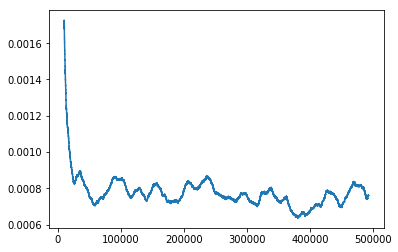

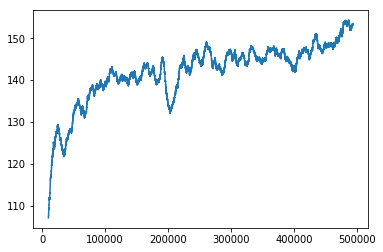

In [350]:
plt.figure(0)
losses.rolling(window=10000).mean().plot()
plt.figure(1)
maxtiles.rolling(window=10000).mean().plot()

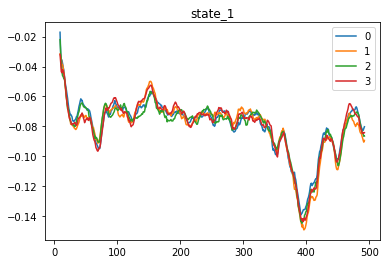

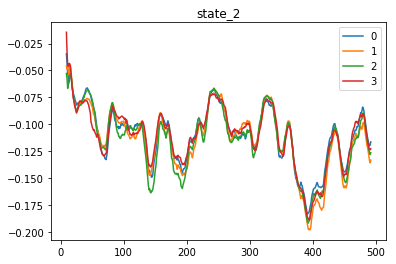

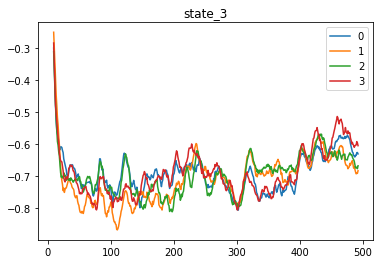

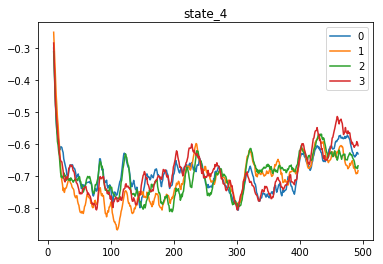

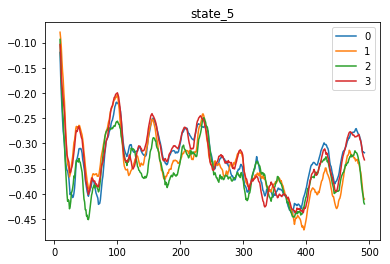

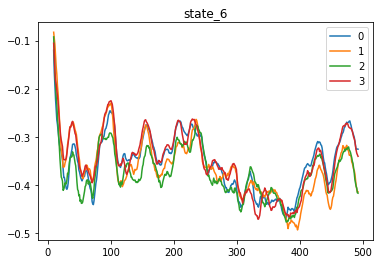

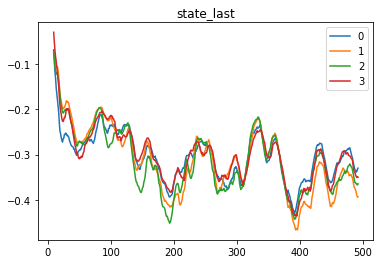

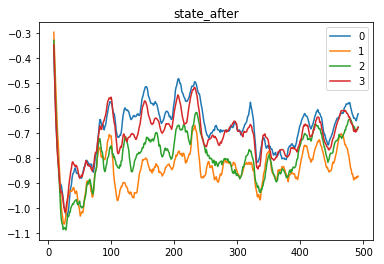

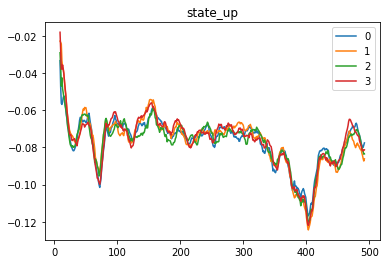

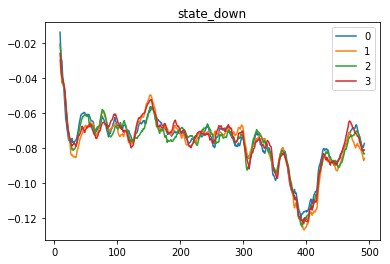

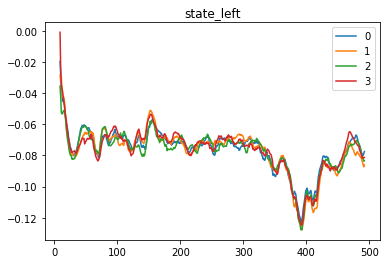

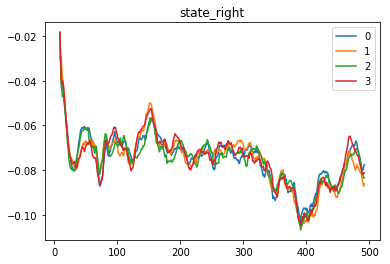

In [351]:
for state_name in ['state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'state_last', 'state_after',
                   'state_up', 'state_down', 'state_left', 'state_right']:
    pd.DataFrame([state[state_name] for state in states]).rolling(window=10).mean().plot(title=state_name)

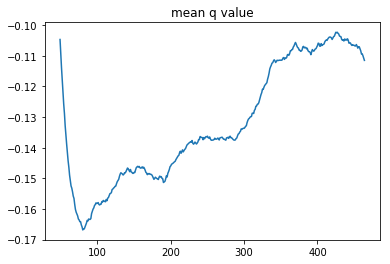

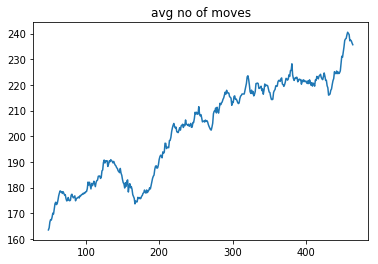

In [386]:
for i, graph_title in enumerate(['mean q value', 'avg no of moves']):
    plt.figure(i)
    pd.Series([score[graph_title] for score in perf]).rolling(window=50).mean().plot(title=graph_title)

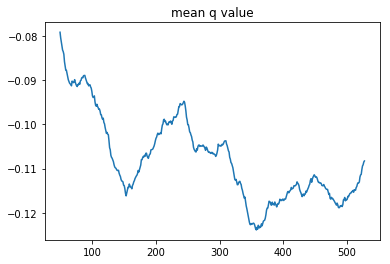

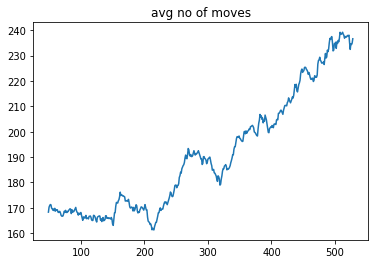

In [391]:
for i, graph_title in enumerate(['mean q value', 'avg no of moves']):
    plt.figure(i)
    pd.Series([score[graph_title] for score in perf]).rolling(window=50).mean().plot(title=graph_title)